# Decision trees

build one!

In [14]:
import os

import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file=f"{os.getcwd()}/iris_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [4]:
%%bash

dot -Tpng iris_tree.dot -o iris_tree.png

![tree](iris_tree.png "decision tree")

Decision Trees do not take much in the way of data prep and are intutative, these are the main advantages.

## Gini impurity

gini ($G_i$) gives the impurity of the $ith$ node. So $G = 0$ is best. 

$$G_i = 1 - \sum^{n}_{k=1}p_{i,k}^2$$

$p_{i,k}$ is the ratio of class k instances among training instances in the $i^{th}$ node

In [60]:
import itertools as it

In [ ]:
for x,y in it.product()

In [117]:
def calc_gini(classes):
    
    ps = [(k/(sum(classes)+1e-9))**2 
          for k in classes
         ]
    return 1- sum(ps)
        

In [118]:
gini_arr = np.array([calc_gini([x,y]) 
                     for x,y in it.product([x for x in range(51)],
                                           [x for x in range(51)]
                                          )
                    ]).reshape([51,51])

In [99]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'class 1')

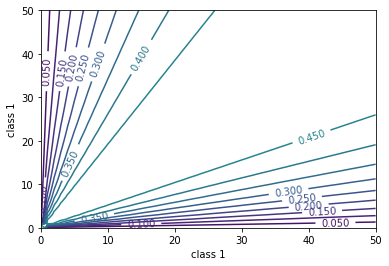

In [127]:
fig = plt.contour(gini_arr, levels=20)
fig.clabel(inline=1, fontsize=10)
plt.xlabel("class 1")
plt.ylabel("class 2")

we see the gini impurity is smallest where it is closest to either axis. This is beacause there are few of the other class 

## CART training

Splits the dataset at each node by identifing the purest subsets, by gini impurity. The cost function it tries to minimise is given below.

Essentially it is an average of the gini impurities of each subset wieghted by the ratio of the number of observations in that subset.


$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

CART is a greedy approach. Therefore it will not always produce the best solution as it might be that a sub-optimial split higher up the tree leads to better splits futher down which the greedy approach will miss. 

Finding the optimal tree takes $O(e(m))$ time - therefore intractable.


In [129]:
import math

In [140]:
math.log(2)

0.6931471805599453

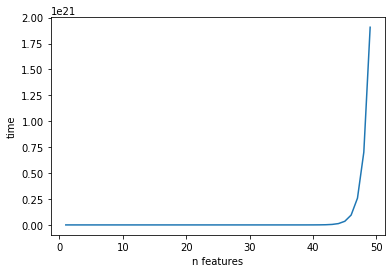

In [145]:
plt.plot(range(1,50), [math.exp(x) for x in range(1,50)])
plt.xlabel("n features")
plt.ylabel("time");

In [172]:
ns =[]
ms = []
times =[]

for n, m in it.product(range(1,50),range(1,50)):
    ns.append(n)
    ms.append(m)
    times.append(n*(m*math.log(m)))

In [174]:
times = np.array(times).reshape(49,-1)

Text(0, 0.5, 'm')

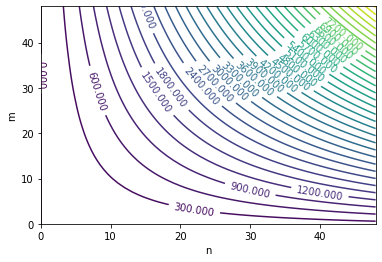

In [182]:
fig = plt.contour(times, levels=35)
fig.clabel(inline=2, fontsize=10)
plt.xlabel("n")
plt.ylabel("m")

might be easier with a fixed number of observations, say 1000

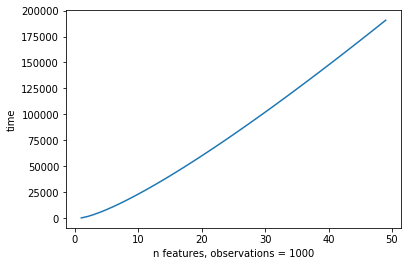

In [187]:
plt.plot(range(1,50), [1000*(x*math.log(x)) for x in range(1,50)])
plt.xlabel("n features, observations = 1000")
plt.ylabel("time");

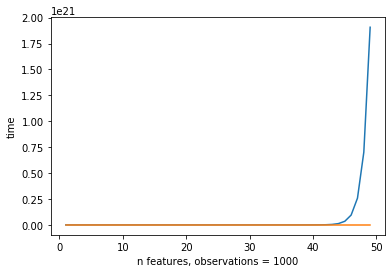

In [188]:
plt.plot(range(1,50), [math.exp(x) for x in range(1,50)])
plt.plot(range(1,50), [1000*(x*math.log(x)) for x in range(1,50)])
plt.xlabel("n features, observations = 1000")
plt.ylabel("time");

Compared to the exhaustive search, it is basically flat

So this is why we have to use a greedy search to find the approximate solution

the training solution that we use is of $O(n \times mlog(m))$. so is more effient in terms of complexity

### predictions
To get predictions, we get  Given this approach the complexity is $O(log_2(m))$ where $m$ is the number of observations. So it is independent of number of features, therefore very effiecient for predictions

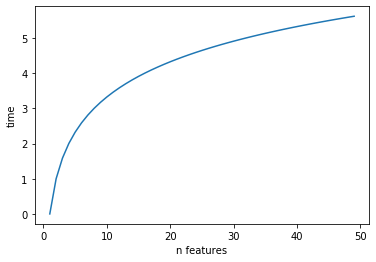

In [144]:
plt.plot(range(1,50), [math.log(x)/math.log(2) for x in range(1,50)])
plt.xlabel("n features")
plt.ylabel("time");

not even double figures!

### Gini impurity or entropy

Entropy approaches zero, the more well ordered the nodes are e.g there information content (their class) is the same.

In [191]:
def calc_entropy(classes):
    es = []
    for k in classes:
        p = k/(sum(classes)+1e-9)
        if p > 0:
            es.append(p*(math.log(p)/math.log(2)))
        else:
            p=np.nan
        
    return -sum(es)

In [192]:
entropy_arr = np.array([calc_entropy([x,y]) 
                     for x,y in it.product([x for x in range(51)],
                                           [x for x in range(51)]
                                          )
                    ]).reshape([51,51])

Text(0, 0.5, 'class 2')

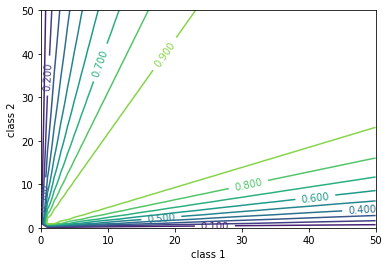

In [196]:
fig = plt.contour(entropy_arr, levels=10)
fig.clabel(inline=2, fontsize=10)
plt.xlabel("class 1")
plt.ylabel("class 2")

Entropy gives similar output to gini. The closer to the axis (pure class nodes) the smaller the entropy and better the performance.

We can see that entropy increases faster than gini with impure nodes. This means gini impurity favours trees that shove the largest class into its one node and the others in the other node. In essence Gini will  score well if it does really well on one node with mixed performance on other nodes while entropy tries to balance performance across all nodes a bit more. Gini is also a bit faster to compute

In [199]:
ent_tree_clf = DecisionTreeClassifier(max_depth=3,
                                      criterion = 'entropy')

ent_tree_clf.fit(X,y)

from sklearn.tree import export_graphviz

export_graphviz(ent_tree_clf,
                out_file=f"{os.getcwd()}/iris_ent_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [201]:
%%bash

dot -Tpng iris_ent_tree.dot -o iris_ent_tree.png

![tree](iris_ent_tree.png "decision tree")

![tree](iris_tree.png "decision tree")

Here it makes no real difference to the result.

Decision trees are non-parametric so has more degrees of freedom, therefore more prone to overfitting.
in Sklearn, we limit theses parameters. This is different to other algorithms that fit the full tree then prune (remove nodes and children) if the decrease in entropy or impurity is not significant.

## Regression trees

For each node, this predicts a value of the observation rather than a category. This value is the mean value of the training observations that fall into that node.

$$J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$

$$where 
   \begin{cases} MSE_{node} = \sum_{i\in node}(\hat{y}_{node}-y^i)^2\\
                 \hat{y} = \frac{1}{m_{node}}\sum_{i\in node}y^i
   \end{cases}
$$

Basically the cost function wie attempt to minimise is the ratio weighted mean squared error of each node. Where the mean squared error is the predicted value for each observation $\hat{y}$ which is the mean of all values in the node and the actual observation $y^i$ in the node. 

## Instability and overfitting.

The main issue with decison trees is that they are sensitive to training data and overfit. 